# Facebook Regression

The input variables are:

* **casualty_class**: One of "passenger", "driver", and "pedestrian".
* **gender**: Male or female.
* **age**: Age of the casualty in years.
* **pedestrian_location**: This field is only valid for pedestrian casualties and specifies where the pedestrian was when the incident occurred.
* **pedestrian_movement**: This field is only valid for pedestrian casualties.
* **travel**: One of "bicycle", "pedestrian", "motorbike", "car", "bus", "taxi", and "other".
* **year**: The year in which the casualty occurred.

And the output variable will be **severe**, which indicates whether or not the person was severely injured or not.
Now do the following:

1. Build a classification model to predict whether a casualty is severe or not. Your model should aim to maximize the accuracy of its predictions.
2. Using your model, quantify how much the different input variables predict the influence of a post. Is there any interesting or unexpected behavior that your model predicts?




In [3]:
## SETTING UP
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
import pylab as pl
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

#import data
data =  pd.read_csv("/Users/tomereldor/PycharmProjects/CS156ML/casualty_train.csv")
data.head(1100)

,casualty_class,gender,age,severe,pedestrian_location,pedestrian_movement,travel,year
0,passenger,female,33,False,NaN,NaN,motorbike,2007
1,passenger,female,20,False,NaN,NaN,car,2005
2,passenger,male,52,False,NaN,NaN,car,2006
3,passenger,female,17,False,NaN,NaN,pedestrian,2012
4,passenger,female,20,False,NaN,NaN,motorbike,2010
5,pedestrian,female,40,True,In road,In Rd Not Crossing,bicycle,2008
6,passenger,female,40,False,NaN,NaN,motorbike,2005
7,passenger,female,23,False,NaN,NaN,taxi,2007
8,driver,female,45,False,NaN,NaN,car,2006
9,pedestrian,male,8,False,Close to Crossing,Drivers N/Side,bicycle,2010


## DATA PREPROCESSING
* Converting stinrgs to dummy variables
* Adding 1s
* Rescaling to standartize / normalize
* Prepare 2nd degree polynomial and interaction columns for regression

In [224]:
## DATA PREPROCESSING

data['1s'] = 1 # we would need a column of ones for linear regression
data['weekend'] = (data['weekday'] > 5)


In [225]:
# converting categorical into dummies:
data['type_post'] = df['type'].astype('category').cat.codes
data['type*cat'] = (data['type_post']) * (data['category'])




In [226]:
## adding higher degrees (for fitting on nonlinear lines) and interactions
for col in ['hour','month','weekday']:
    for order in [2]:
        colname = str(col) + "^" + str(order)
        #print colname
        data[colname] = data[col]**order
data.head()

,total_followers,type,category,month,weekday,hour,paid,comment,like,share,1s,weekend,type_post,type*cat,hour^2,month^2,weekday^2
0,124050,Photo,3,6,4,17,1,3,77,16,1,False,1,3,289,36,16
1,132556,Photo,2,8,3,24,0,11,313,50,1,False,1,2,576,64,9
2,92786,Photo,2,2,6,17,1,2,145,39,1,True,1,2,289,4,36
3,135632,Photo,1,9,2,1,0,2,299,49,1,False,1,1,1,81,4
4,139540,Link,1,12,3,17,1,7,229,21,1,False,0,0,289,144,9


In [227]:
cols = list(data)
cols

['total_followers',
 'type',
 'category',
 'month',
 'weekday',
 'hour',
 'paid',
 'comment',
 'like',
 'share',
 '1s',
 'weekend',
 'type_post',
 'type*cat',
 'hour^2',
 'month^2',
 'weekday^2']

In [228]:
cols =  ['total_followers',
'type_post',
 'type*cat',
 'category',
 'paid',
 'month',
 'weekday',
 'hour',
'weekend',
 'hour^2',
 'hour^3',
 'month^2',
 'month^3',
 'weekday^2',
 'weekday^3',
 'comment',
 'like',
 'share']

In [229]:
#reorder columns
#cols.insert(2, cols.pop(cols.index('type_post')))
#cols.insert(4, cols.pop(cols.index('type*cat')))
#cols.insert(-3, cols.pop(cols.index('1s')))
data = data.ix[:, cols]
data.head(20)

,total_followers,type_post,type*cat,category,paid,month,weekday,hour,weekend,hour^2,hour^3,month^2,month^3,weekday^2,weekday^3,comment,like,share
0,124050,1,3,3,1,6,4,17,False,289,NaN,36,NaN,16,NaN,3,77,16
1,132556,1,2,2,0,8,3,24,False,576,NaN,64,NaN,9,NaN,11,313,50
2,92786,1,2,2,1,2,6,17,True,289,NaN,4,NaN,36,NaN,2,145,39
3,135632,1,1,1,0,9,2,1,False,1,NaN,81,NaN,4,NaN,2,299,49
4,139540,0,0,1,1,12,3,17,False,289,NaN,144,NaN,9,NaN,7,229,21
5,138969,1,3,3,1,12,5,17,False,289,NaN,144,NaN,25,NaN,3,284,31
6,124025,1,3,3,0,6,3,18,False,324,NaN,36,NaN,9,NaN,10,240,28
7,131431,2,4,2,1,7,6,20,True,400,NaN,49,NaN,36,NaN,7,16,1
8,137820,1,1,1,1,11,7,16,True,256,NaN,121,NaN,49,NaN,21,490,90
9,137553,2,4,2,0,11,4,17,False,289,NaN,121,NaN,16,NaN,2,96,15


In [230]:
input_vars =  ['total_followers',
'type_post',
 'type*cat',
 'category',
 'paid',
 'month',
 'weekday',
 'hour',
'weekend',
 'hour^2',
 'hour^3',
 'month^2',
 'month^3',
 'weekday^2',
 'weekday^3']
output_vars = ['comment','like','share']


In [231]:
x_pd = data[input_vars]
y_pd = data['like']

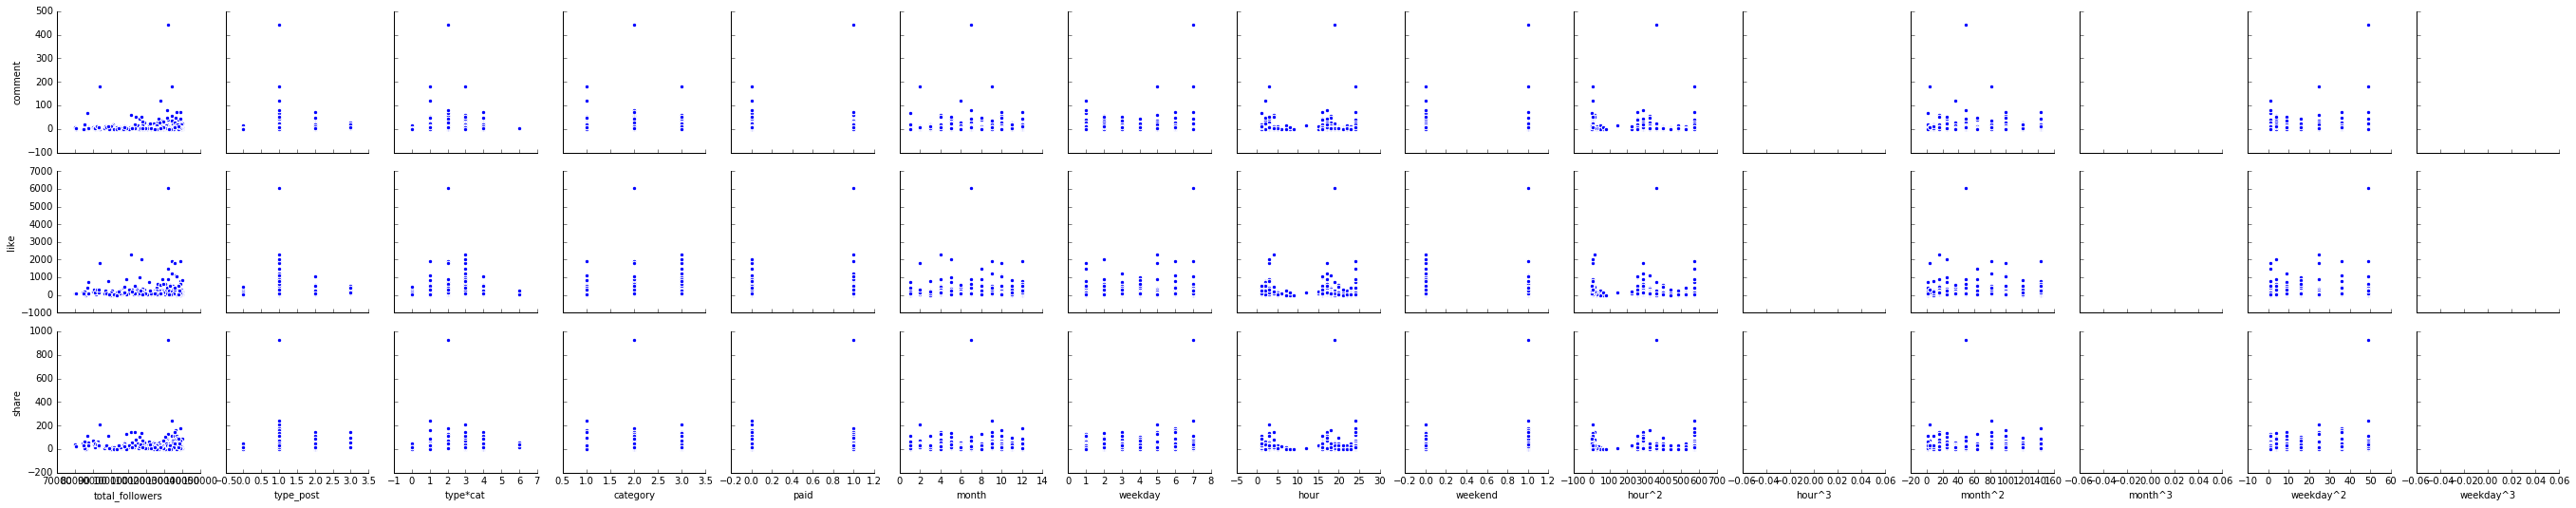

In [232]:
# Data Exploring
#visualize histograms or relationships between features and response using scatterplots
sns.pairplot(data, x_vars=input_vars, y_vars=output_vars)#, size=7, aspect=0.7)

In [233]:
data[input_vars].head()

,total_followers,type_post,type*cat,category,paid,month,weekday,hour,weekend,hour^2,hour^3,month^2,month^3,weekday^2,weekday^3
0,124050,1,3,3,1,6,4,17,False,289,NaN,36,NaN,16,NaN
1,132556,1,2,2,0,8,3,24,False,576,NaN,64,NaN,9,NaN
2,92786,1,2,2,1,2,6,17,True,289,NaN,4,NaN,36,NaN
3,135632,1,1,1,0,9,2,1,False,1,NaN,81,NaN,4,NaN
4,139540,0,0,1,1,12,3,17,False,289,NaN,144,NaN,9,NaN


In [234]:
x = np.array(data[input_vars])
y = data['like']
x[:20]
y[:20]

0       77
1      313
2      145
3      299
4      229
5      284
6      240
7       16
8      490
9       96
10      36
11      48
12     399
13     189
14     243
15    1826
16     153
17     131
18     372
19      63
Name: like, dtype: int64

In [235]:
## STANDARTIZE DATA 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_s = scaler.transform(x)
x_s[:20]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
## ADD INTERACTION & 2nd Degree Columns
#from sklearn.preprocessing import PolynomialFeatures


# PolynomialFeatures (prepreprocessing)
#poly = PolynomialFeatures(degree=2)
#X_poly = poly.fit_transform(x)
#
#target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(data.columns,p) for p in poly.powers_]]
#output_df = pd.DataFrame(X_spoly, columns = target_feature_names)
#output_df.head()

In [ ]:
# Create linear regression object
#from sklearn.linear_model.LinearRegression()
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x,y)


In [ ]:
# Let's see predictions for the first 10 instances
print linreg.predict(x[:20])

### First pass: verifying 

In [ ]:
# Compute RMSE on training data
# p = np.array([linreg.predict(xi) for xi in x])
p = linreg.predict(x)
# Now we can constuct a vector of errors
err = abs(p-y)

# Let's see the error on the first 10 predictions
print err[:10]

In [ ]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print rmse_train

In [ ]:
# We can view the regression coefficients
print 'Regression Coefficients: \n', linreg.coef_


In [ ]:
# Plot outputs
%matplotlib inline
pl.plot(p, y,'ro')
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

## K-fold Cross Validation

In [252]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    linreg.fit(x[train],y[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [237]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 402.1737
RMSE on 10-fold CV: 421.1941


In [249]:
# We can view the regression coefficients
print 'Regression Coefficients: \n', linreg.coef_



Regression Coefficients: 
[  1.54870561e-02   5.73689917e+01  -5.11953973e+01   1.07194927e+02
   1.26648016e+02  -2.10413619e+02  -1.64111374e+02   3.81628996e+01
  -1.02682341e+02  -3.21381423e+00   7.58134090e-02   1.73332192e+01
  -5.70182181e-01   3.22516648e+01  -1.14703859e+00]


AttributeError: 'LinearRegression' object has no attribute 'coef'

In [251]:
linreg

array([  1.54870561e-02,   5.73689917e+01,  -5.11953973e+01,
         1.07194927e+02,   1.26648016e+02,  -2.10413619e+02,
        -1.64111374e+02,   3.81628996e+01,  -1.02682341e+02,
        -3.21381423e+00,   7.58134090e-02,   1.73332192e+01,
        -5.70182181e-01,   3.22516648e+01,  -1.14703859e+00])

In [256]:
for i in range(len(linreg.coef_)):
    print list(data)[i], linreg.coef_[i]

total_followers 0.0154870561336
type_post 57.3689917202
type*cat -51.1953972681
category 107.19492705
paid 126.64801637
month -210.413618766
weekday -164.111373768
hour 38.1628996269
weekend -102.682340646
hour^2 -3.21381423372
hour^3 0.0758134090068
month^2 17.3332192062
month^3 -0.570182180891
weekday^2 32.2516647592
weekday^3 -1.14703858646


In [243]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
a=0.3
for name,met in [
        ('linear regression', LinearRegression()) #,
  #      ('lasso', Lasso(fit_intercept=True, alpha=a)),
  #      ('ridge', Ridge(fit_intercept=True, alpha=a)),
  #      ('elastic-net', ElasticNet(fit_intercept=True, alpha=a))
        ]:
    met.fit(x,y)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(x)
    e = p-y
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(len(x), n_folds=10)
    err = 0
    for train,test in kf:
        met.fit(x[train],y[train])
        p = met.predict(x[test])
        e = p-y[test]
        err += np.dot(e,e)

    rmse_10cv = np.sqrt(err/len(x))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print "\n"

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').